### Convolutional Neural Networks (CNNs)

CNNs are a class of deep neural networks:for image processing tasks. They are designed to automatically and adaptively learn spatial hierarchies of features from images. CNNs use a combination of convolutional layers, pooling layers, and fully connected layers to achieve state-of-the-art performance in various computer vision tasks.

#### Key Components of CNNs

1. **Input Layers**: The input layer is responsible for receiving the raw pixel data from the input images. It typically retains the spatial structure of the image, allowing subsequent layers to process the data effectively.

2. **Convolutional Layers**: These layers apply convolution operations to the input image, using learnable filters (kernels) to extract features such as edges, textures, and patterns. The output of a convolutional layer is a feature map that highlights the presence of specific features in the input.

3. **Activation Functions**: After each convolution operation, an activation function (e.g., ReLU) is applied to introduce non-linearity into the model, allowing it to learn more complex patterns.

4. **Pooling Layers**: Pooling layers downsample the feature maps, reducing their spatial dimensions while retaining important information. This helps to make the model more robust to variations in the input (e.g., translation, rotation).

5. **Fully Connected Layers**: After several convolutional and pooling layers, the high-level features are flattened and passed through fully connected layers for classification or regression tasks.

6. **Output Activation Functions**: The final layer of a CNN typically includes an output activation function (e.g., softmax for multi-class classification) to produce the final predictions.
#### Applications of CNNs

CNNs applied to a wide range of computer vision tasks, including:

- Image classification (e.g., identifying objects in images)
- Object detection (e.g., locating and classifying multiple objects in an image)
- Semantic segmentation (e.g., assigning a class label to each pixel in an image)
- Image generation (e.g., generating new images from learned representations)

#### Conclusion

Convolutional Neural Networks have revolutionized the field of computer vision.

In [3]:
# 0. Computer vision libraries in Pytorch

import torch 
from torch import nn

import torchvision                           # Base domain library
import torchvision.models as models         # Pre-trained models for transfer learning
import torchvision.datasets as datasets      # Get datasets and data loading functions
import torchvision.transforms as transforms  # Data preprocessing for computer vision tasks
import torch.utils.data.dataset as data               # Data loading utilities
import torch.utils.data.dataloader as dataloader       # Data loading utilities

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# check versions

print(torch.__version__)
print(torchvision.__version__)

2.9.0+cpu
0.24.0+cpu


In [7]:
# 1.  Getting a dataset

### Built-in dataset in torchvision.datasets.FashionMNIST
## Fashion MNIST
from torchvision import datasets
train_data = datasets.FashionMNIST(root='data',   # where to store the data
                                   train=True,    # do we want the training set?
                                   download=True, # do we want to download the data?
                                   transform=torchvision.transforms.ToTensor(), 
                                   target_transform=None  # how to transform the target/labels
                                   )

test_data = datasets.FashionMNIST(root='data',   # where to store the data
                                   train=False,   # do we want the test set?
                                   download=True, # do we want to download the data?
                                   transform=torchvision.transforms.ToTensor(), 
                                   target_transform=None  # how to transform the target/labels
                                   )

In [6]:
len(train_data), len(test_data)

(60000, 10000)

In [10]:
### Se the first training example

image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [12]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx    # a dictionary mapping class names to indices

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [14]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
## check the shapes
image.shape    # (color, height, width)    # one color -> black or white
# label          # (1,)    # single label

torch.Size([1, 28, 28])

Image Shape:torch.Size([1, 28, 28])


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

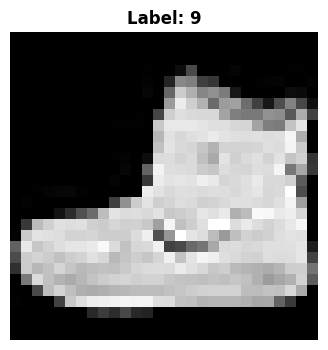

In [33]:

### 1.2 Visualize our data
import matplotlib.pyplot as plt
image, label = train_data[0]
 
print(f'Image Shape:{image.shape}')
plt.figure(figsize= (4,4))
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f'Label: {label}')
plt.axis('off')

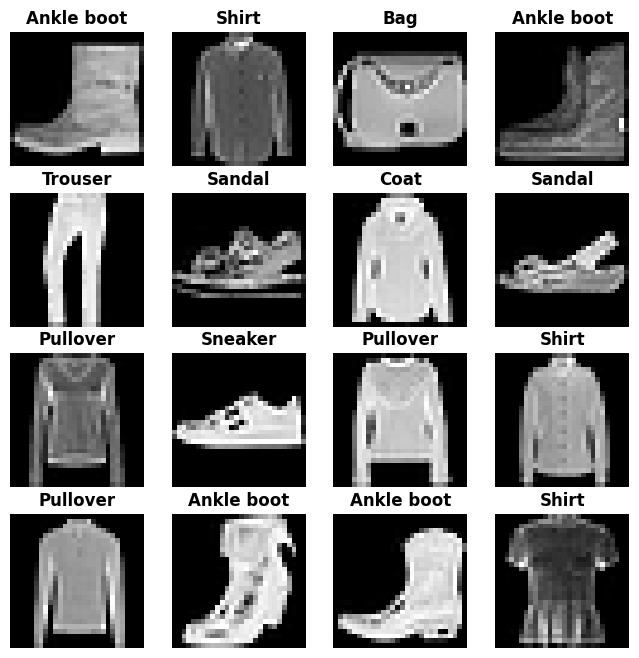

In [39]:
# plot more random images
torch.manual_seed(42)
fig = plt.figure(figsize=(8, 8))
rows, cols = 4, 4
for i in range(1,rows * cols + 1):
    # print(f'Plotting image {i}')
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    # print(random_idx)
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)    # or 'of'
